In [107]:
import math
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
import polars as pl

In [2]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [3]:
EGFR_uniprot_id = "P00533"

In [4]:
targets_api.get(target_components_accession=EGFR_uniprot_id).only("target_chembl_id", "organism", "pref_name", "target_type")

[{'organism': 'Homo sapiens', 'pref_name': 'Maltase-glucoamylase', 'target_chembl_id': 'CHEMBL2074', 'target_type': 'SINGLE PROTEIN'}, {'organism': 'Homo sapiens', 'pref_name': 'Sulfonylurea receptor 2', 'target_chembl_id': 'CHEMBL1971', 'target_type': 'SINGLE PROTEIN'}, {'organism': 'Homo sapiens', 'pref_name': 'Phosphodiesterase 5A', 'target_chembl_id': 'CHEMBL1827', 'target_type': 'SINGLE PROTEIN'}, {'organism': 'Homo sapiens', 'pref_name': 'Voltage-gated T-type calcium channel alpha-1H subunit', 'target_chembl_id': 'CHEMBL1859', 'target_type': 'SINGLE PROTEIN'}, '...(remaining elements truncated)...']

In [5]:
EGFR_chembl_id = "CHEMBL2074"

In [68]:
EGFR_bioactivity_raw = pd.DataFrame(bioactivities_api.get(target_chembl_id=EGFR_chembl_id, type="IC50", relation="=", assay_type="B"))

In [69]:
EGFR_bioactivity_raw.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [72]:
EGFR_bioactivity = EGFR_bioactivity_raw[["activity_id", "assay_chembl_id", "molecule_chembl_id", "type", "units", "standard_value"]]

In [73]:
EGFR_bioactivity = EGFR_bioactivity.dropna(axis=0)

In [74]:
EGFR_bioactivity = EGFR_bioactivity.drop_duplicates("assay_chembl_id")

In [75]:
EGFR_bioactivity = EGFR_bioactivity[EGFR_bioactivity['units'] == "uM"]

In [76]:
EGFR_bioactivity = EGFR_bioactivity[EGFR_bioactivity['type'] == "IC50"]

In [77]:
EGFR_bioactivity = EGFR_bioactivity.reset_index(drop=True)

In [78]:
EGFR_bioactivity

,activity_id,assay_chembl_id,molecule_chembl_id,type,units,standard_value
0,306817,CHEMBL649260,CHEMBL2114210,IC50,uM,110000.0
1,333831,CHEMBL816395,CHEMBL2093897,IC50,uM,8400.0
2,437093,CHEMBL710107,CHEMBL77918,IC50,uM,50000.0
3,441033,CHEMBL710106,CHEMBL307429,IC50,uM,360.0
4,854643,CHEMBL646887,CHEMBL44,IC50,uM,10400.0
5,854644,CHEMBL646886,CHEMBL44,IC50,uM,2610.0
6,1401852,CHEMBL827835,CHEMBL307429,IC50,uM,40.0
7,1714883,CHEMBL865094,CHEMBL380336,IC50,uM,101000.0
8,2028501,CHEMBL886166,CHEMBL241374,IC50,uM,100000.0
9,3204041,CHEMBL1099881,CHEMBL307429,IC50,uM,2000.0


In [96]:
EGFR_molecules = compounds_api.get(target_chembl_id="CHEMBL2074")

In [115]:
# Get list of molecule chembl ids from EGFR_bioactivity
molecule_ids = EGFR_bioactivity['molecule_chembl_id'].tolist()

# Filter the EGFR_molecules to only include those molecules
EGFR_molecules = compounds_api.filter(molecule_chembl_id__in=molecule_ids).only("molecule_chembl_id", "molecule_structures")

In [165]:
# Convert EGFR_molecules to a DataFrame
EGFR_molecules_df = pd.DataFrame(list(EGFR_molecules))

# Merge EGFR_bioactivity with EGFR_molecules_df based on molecule_chembl_id
EGFR_combined = pd.merge(
    EGFR_bioactivity,
    EGFR_molecules_df,
    on="molecule_chembl_id",
    how="inner"
)

# Drop duplicates
EGFR_combined = EGFR_combined.drop_duplicates("molecule_chembl_id").reset_index(drop=True)

# Display the first few rows of the joined dataframe
EGFR_combined

,activity_id,assay_chembl_id,molecule_chembl_id,type,units,IC50,pIC50,molecule_structures
0,306817,CHEMBL649260,CHEMBL2114210,IC50,uM,110000.0,0.958607,{'canonical_smiles': 'OC[C@H]1N[C@H](CO)[C@@H]...
1,333831,CHEMBL816395,CHEMBL2093897,IC50,uM,8400.0,2.075721,{'canonical_smiles': 'OC[C@@H]1N[C@H](CO)[C@@H...
2,437093,CHEMBL710107,CHEMBL77918,IC50,uM,50000.0,1.301030,{'canonical_smiles': 'CCCCN1[C@H](CO)[C@@H](O)...
3,441033,CHEMBL710106,CHEMBL307429,IC50,uM,360.0,3.443697,{'canonical_smiles': 'OC[C@H]1NC[C@H](O)[C@@H]...
4,854643,CHEMBL646887,CHEMBL44,IC50,uM,10400.0,1.982967,{'canonical_smiles': 'O=c1c(-c2ccc(O)cc2)coc2c...
5,1714883,CHEMBL865094,CHEMBL380336,IC50,uM,101000.0,0.995679,{'canonical_smiles': 'C=C1CC[C@@H]2[C@]3(C)COC...
6,2028501,CHEMBL886166,CHEMBL241374,IC50,uM,100000.0,1.000000,{'canonical_smiles': 'C=C1CC[C@@H]2[C@](C)(CO)...
7,15091549,CHEMBL3384694,CHEMBL574645,IC50,uM,3000.0,2.522879,{'canonical_smiles': 'OC[C@@H]1[C@@H](O)[C@H](...
8,15206378,CHEMBL3411113,CHEMBL3407617,IC50,uM,6500.0,2.187087,{'canonical_smiles': 'COc1ccc(O)c(/C=N/NC(=O)c...
9,16616240,CHEMBL3815265,CHEMBL3814747,IC50,uM,2000.0,2.698970,{'canonical_smiles': 'CO[C@@H](CO)[C@H](O)C[S+...


In [166]:
EGFR_combined['canonical smiles'] = EGFR_combined['molecule_structures'].apply(
    lambda x: x.get('canonical_smiles') if isinstance(x, dict) else None
)

In [172]:
EGFR_combined = EGFR_combined.drop('molecule_structures', axis=1)

In [136]:
# Rename standard_value to IC50
EGFR_bioactivity = EGFR_bioactivity.rename(columns={'standard_value': 'IC50'})

# Calculate pIC50 = -log10(IC50)
EGFR_bioactivity['pIC50'] = -np.log10(EGFR_bioactivity['IC50'].astype(float) / 1000000)  # Convert from uM to M before taking log

# Drop duplicates
EGFR_bioactivity = EGFR_bioactivity.drop_duplicates("molecule_chembl_id").reset_index(drop=True)

# Display the first few rows to verify
EGFR_bioactivity

,activity_id,assay_chembl_id,molecule_chembl_id,type,units,IC50,pIC50
0,306817,CHEMBL649260,CHEMBL2114210,IC50,uM,110000.0,0.958607
1,333831,CHEMBL816395,CHEMBL2093897,IC50,uM,8400.0,2.075721
2,437093,CHEMBL710107,CHEMBL77918,IC50,uM,50000.0,1.301030
3,441033,CHEMBL710106,CHEMBL307429,IC50,uM,360.0,3.443697
4,854643,CHEMBL646887,CHEMBL44,IC50,uM,10400.0,1.982967
5,1714883,CHEMBL865094,CHEMBL380336,IC50,uM,101000.0,0.995679
6,2028501,CHEMBL886166,CHEMBL241374,IC50,uM,100000.0,1.000000
7,15091549,CHEMBL3384694,CHEMBL574645,IC50,uM,3000.0,2.522879
8,15206378,CHEMBL3411113,CHEMBL3407617,IC50,uM,6500.0,2.187087
9,16616240,CHEMBL3815265,CHEMBL3814747,IC50,uM,2000.0,2.698970


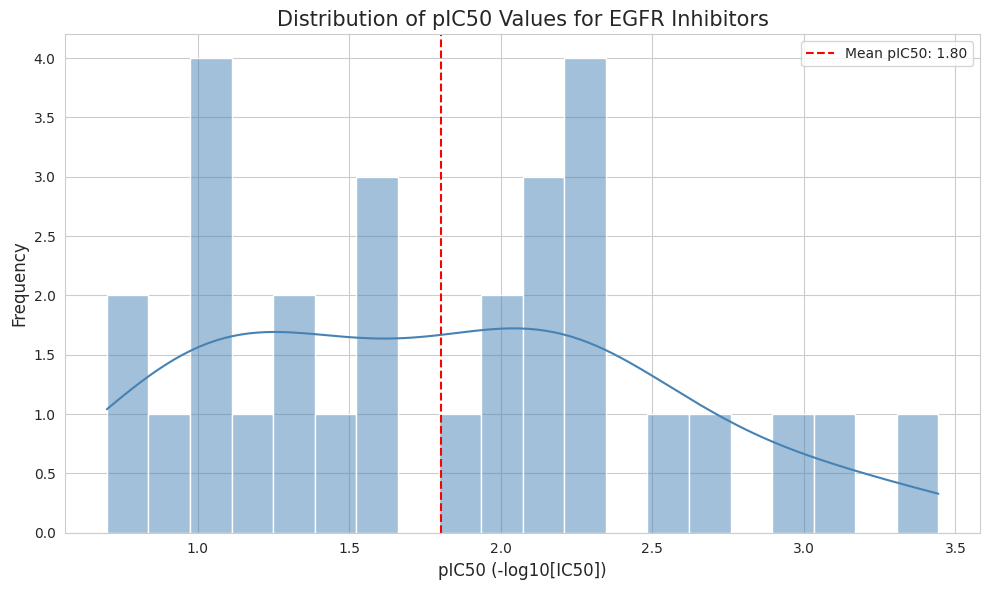

In [173]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for the plot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Create histogram of pIC50 values
sns.histplot(data=EGFR_bioactivity, x='pIC50', bins=20, kde=True, color='steelblue')

# Add title and labels
plt.title('Distribution of pIC50 Values for EGFR Inhibitors', fontsize=15)
plt.xlabel('pIC50 (-log10[IC50])', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical line at mean
mean_pIC50 = EGFR_bioactivity['pIC50'].mean()
plt.axvline(x=mean_pIC50, color='red', linestyle='--', 
            label=f'Mean pIC50: {mean_pIC50:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

In [174]:
# Get the top 3 compounds with highest pIC50 values
top3_compounds = EGFR_bioactivity.sort_values('pIC50', ascending=False).head(3)

# Create a DataFrame for display with RDKit
top3_display = pd.merge(
    top3_compounds,
    EGFR_molecules_df,
    on="molecule_chembl_id",
    how="inner"
)

# Convert the DataFrame to an RDKit dataframe with molecular structures
display_df = top3_display.copy()
# Extract the SMILES from the molecule_structures dictionary column
display_df['smiles'] = display_df['molecule_structures'].apply(
    lambda x: x['canonical_smiles'] if isinstance(x, dict) and 'canonical_smiles' in x else None
)

# Use RDKit to add molecular structures
PandasTools.AddMoleculeColumnToFrame(display_df, 'smiles', 'Molecule')

# Display the DataFrame with structures, pIC50 values, and other relevant info
display_df[['Molecule', 'molecule_chembl_id', 'IC50', 'pIC50']]

,Molecule,molecule_chembl_id,IC50,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x760d685070d0>,CHEMBL307429,360.0,3.443697
1,<rdkit.Chem.rdchem.Mol object at 0x760d68506ab0>,CHEMBL5175772,890.0,3.050610
2,<rdkit.Chem.rdchem.Mol object at 0x760d68507a70>,CHEMBL480722,1080.0,2.966576


In [175]:
from rdkit.Chem import Draw

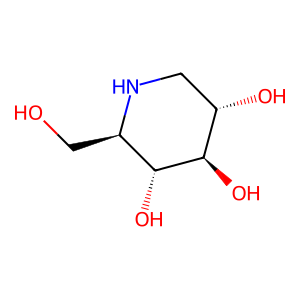

In [176]:
Draw.MolToImage(display_df['Molecule'][0])

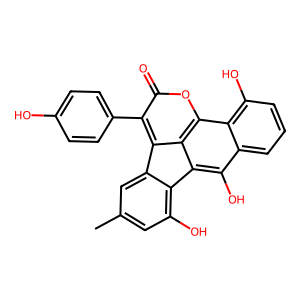

In [177]:
Draw.MolToImage(display_df['Molecule'][1])

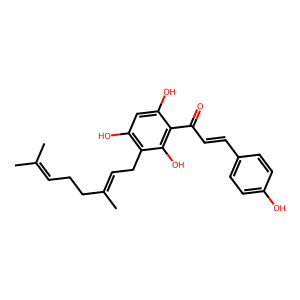

In [178]:
Draw.MolToImage(display_df['Molecule'][2])

In [179]:
EGFR_combined.to_csv("EGFR_combined.csv", index=False)